In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, multilabel_confusion_matrix, precision_recall_curve, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [3]:
data = pd.read_csv("fish_data.csv")

In [4]:
data.dtypes

,0
species,object
length,float64
weight,float64
w_l_ratio,float64


In [5]:
print(data.isna().sum()) #Считаем количество NaN значений в датасете
print(data.isnull().sum()) #Считаем количество пропусков в датасете

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64
species      0
length       0
weight       0
w_l_ratio    0
dtype: int64


In [6]:
#Преобразуем строковые классы в числовые метки
print(list(zip(data['species'].unique(), [i for i in range(len(data['species'].unique()))])))
data['species'].replace(data['species'].unique(), [i for i in range(len(data['species'].unique()))], inplace = True)

[('Anabas testudineus', 0), ('Coilia dussumieri', 1), ('Otolithoides biauritus', 2), ('Otolithoides pama', 3), ('Pethia conchonius', 4), ('Polynemus paradiseus', 5), ('Puntius lateristriga', 6), ('Setipinna taty', 7), ('Sillaginopsis panijus', 8)]


<ipython-input-6-616817fb8223>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['species'].replace(data['species'].unique(), [i for i in range(len(data['species'].unique()))], inplace = True)
<ipython-input-6-616817fb8223>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['species'].replace

<Axes: >

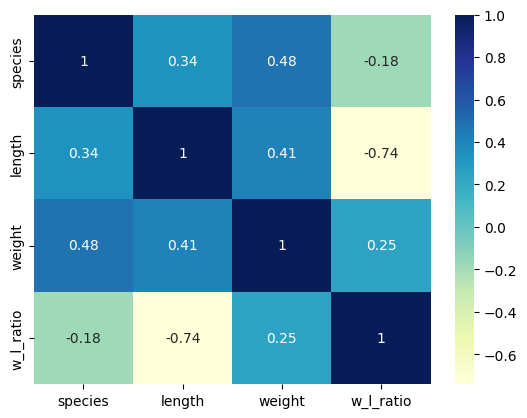

In [7]:
corr_matrix_pearson = data.select_dtypes(include='number').corr(method = 'pearson').round(2)
sns.heatmap(corr_matrix_pearson, cmap="YlGnBu", annot=True)

<Axes: >

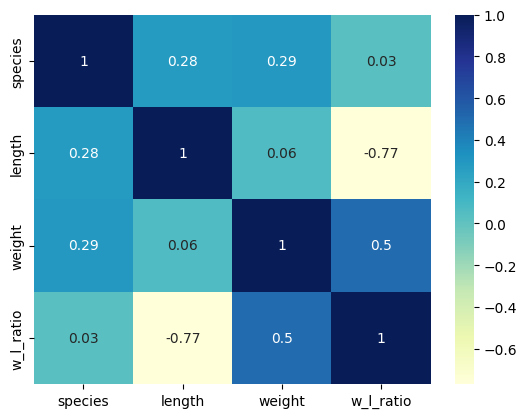

In [8]:
corr_matrix_spearman = data.select_dtypes(include='number').corr(method = 'spearman').round(2)
sns.heatmap(corr_matrix_spearman, cmap="YlGnBu", annot=True)

In [9]:
data.iloc[:,range(1,4)] = StandardScaler().fit_transform(data.iloc[:,range(1,4)]) #Стандартизируем фичи

In [10]:
#Разбиение данных на тестовую и обучающую выборки
x = data.iloc[:,range(1,4)]
y = data.iloc[:,0]
y_bin = label_binarize(y, classes = [*range(len(y.unique()))])
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size = 0.2, random_state = 2024-9-29)

In [11]:
#Мультиклассовая классификация с использованием логистической регрессии
model1 = OneVsRestClassifier(LogisticRegression())
model1.fit(x_train, y_train)
preds1_proba = model1.predict_proba(x_test)
preds1 = model1.predict(x_test)

Accuracy: 0.5649509803921569
F1-мера: 0.5997445586557294


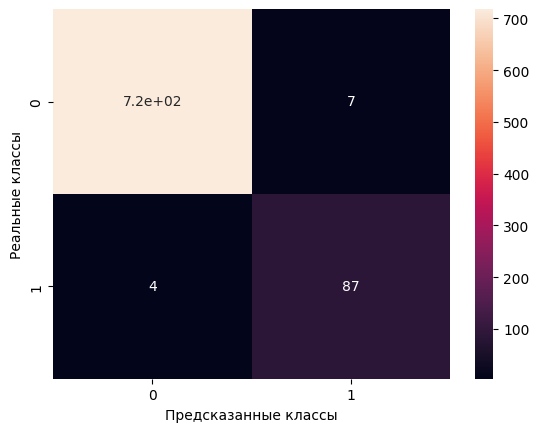

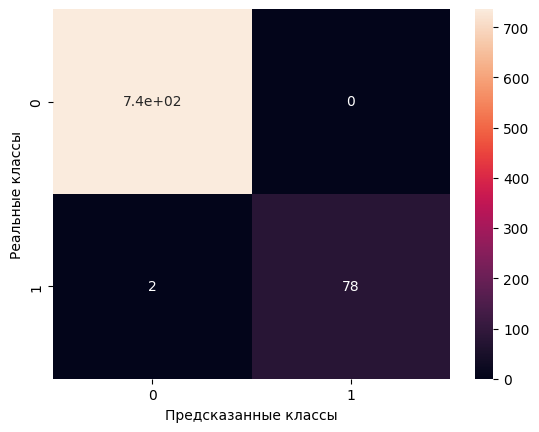

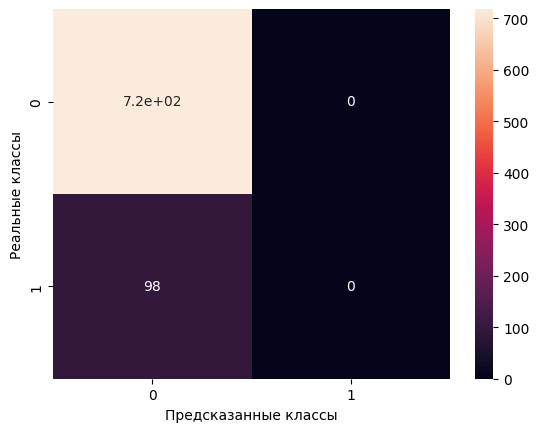

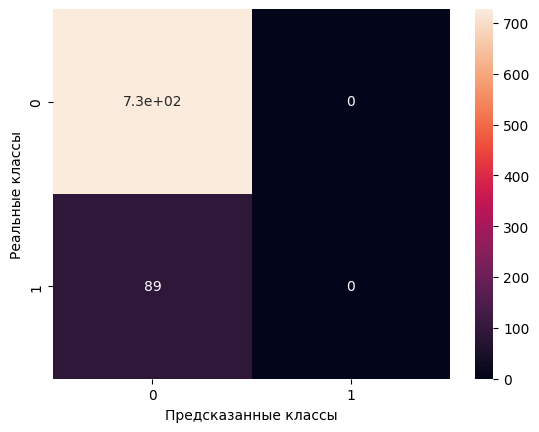

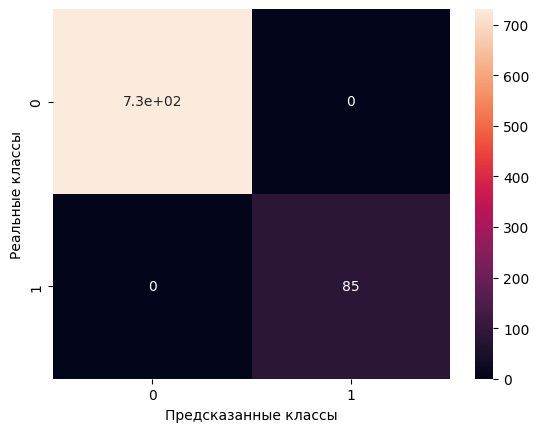

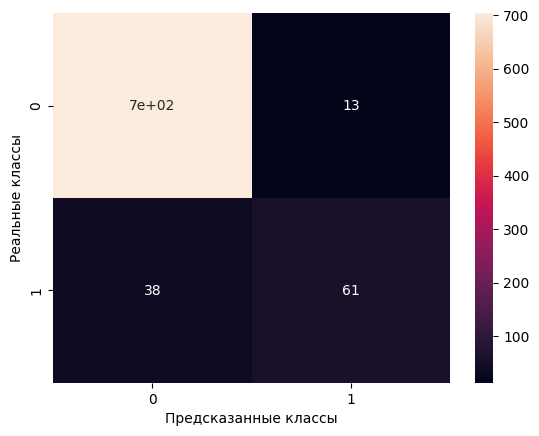

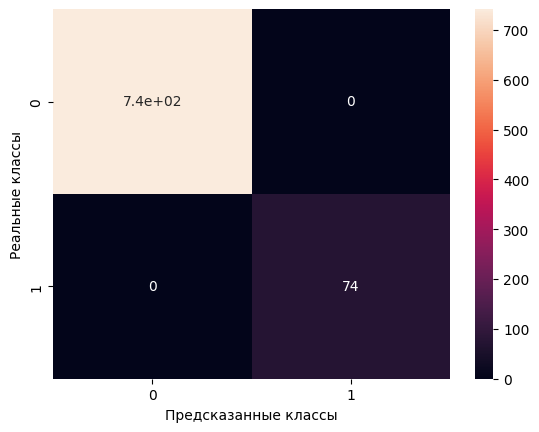

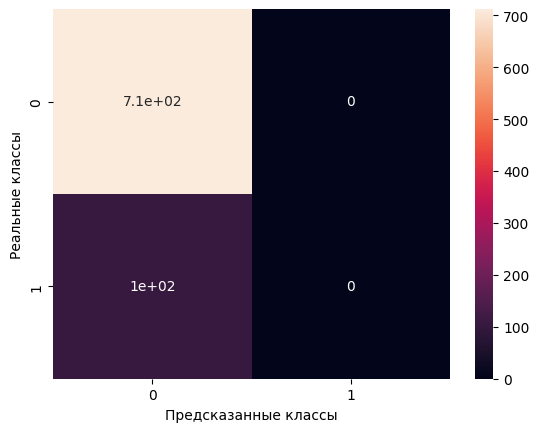

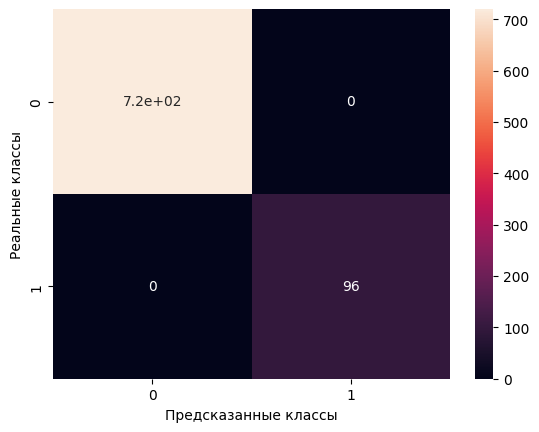

In [12]:
#Метрики качества полученной модели полиномиальной логистической регрессии
accuracy = accuracy_score(y_test, preds1)
f1 = f1_score(y_test, preds1, average='weighted')
conf_matrix = multilabel_confusion_matrix(y_test, preds1)
print(f'Accuracy: {accuracy}')
print(f'F1-мера: {f1}')
for i in range(conf_matrix.shape[0]):
  sns.heatmap(conf_matrix[i], label=True, annot=True)
  plt.ylabel('Реальные классы')
  plt.xlabel('Предсказанные классы')
  plt.show()

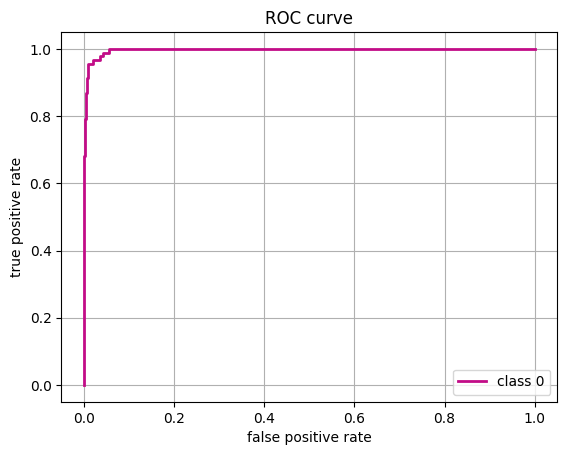

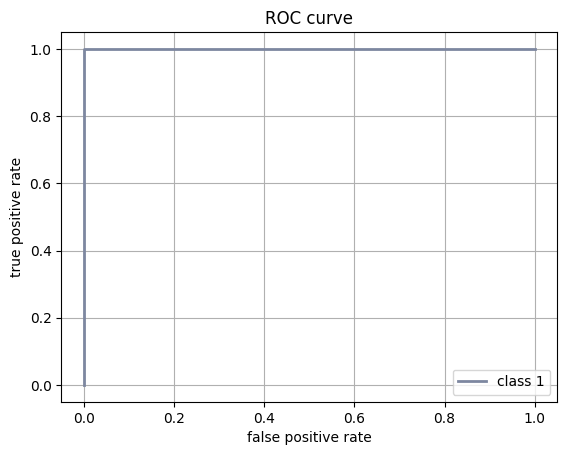

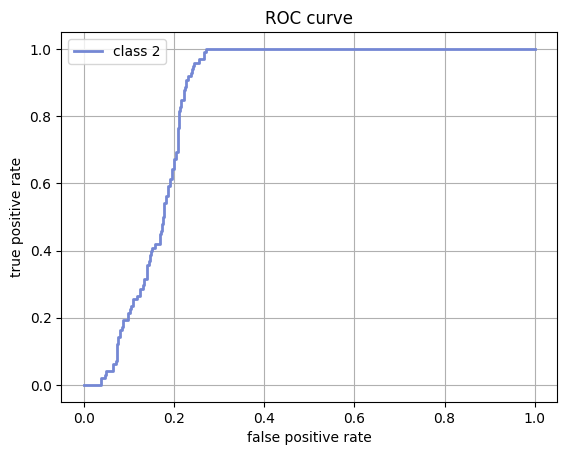

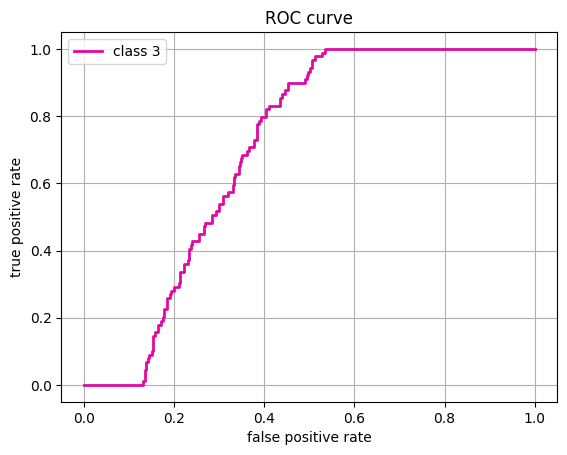

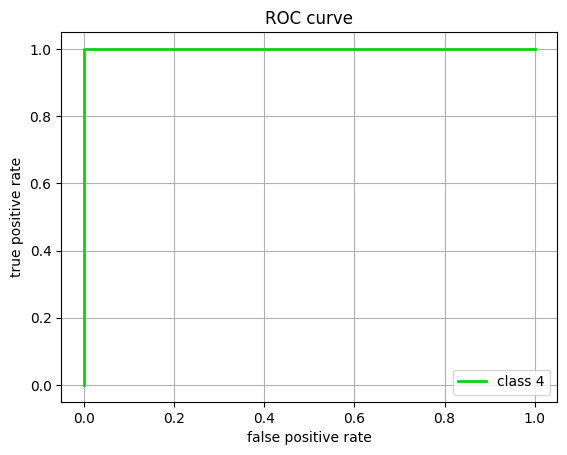

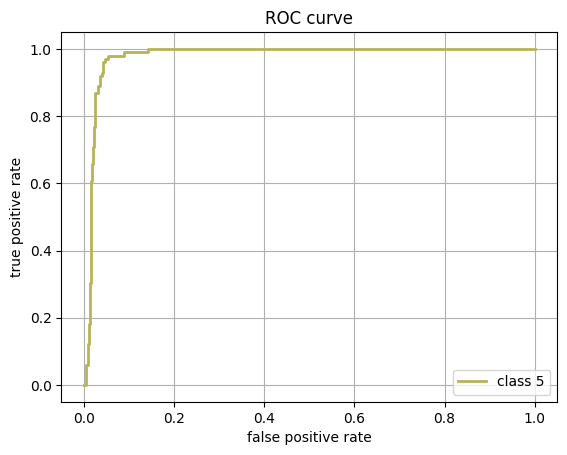

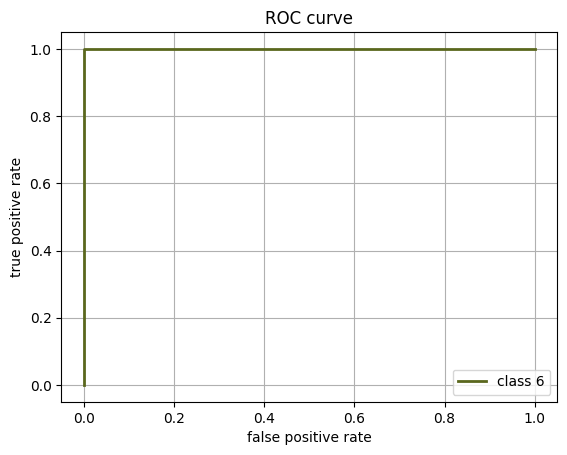

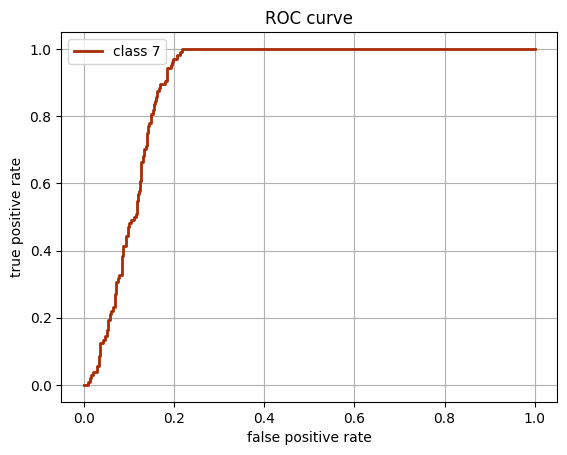

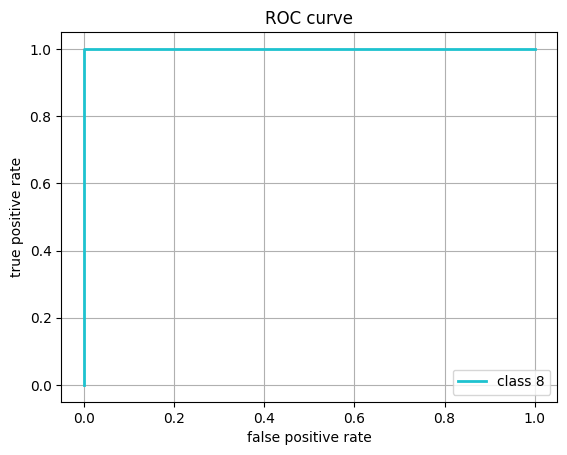

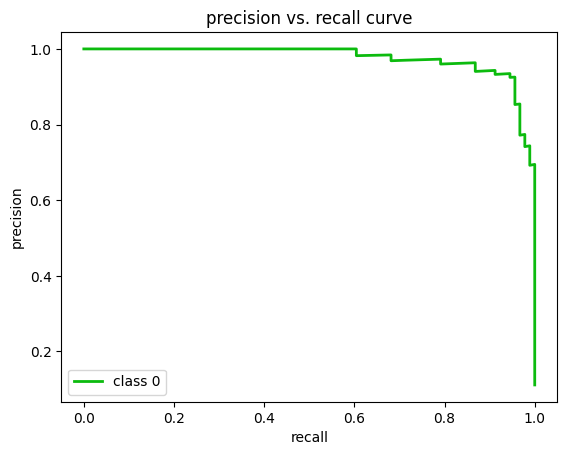

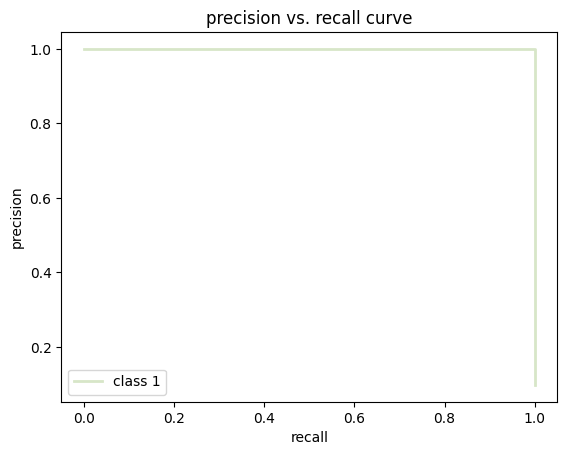

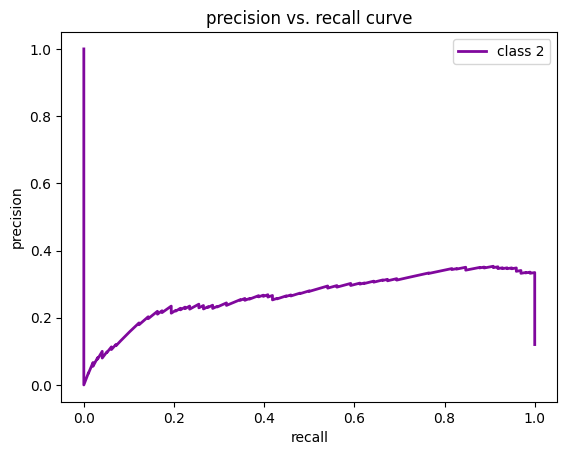

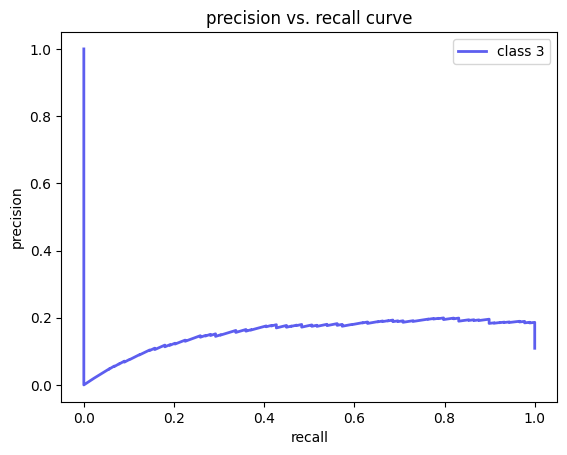

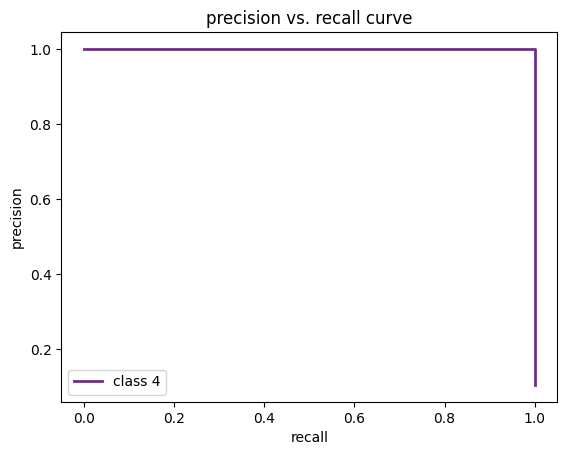

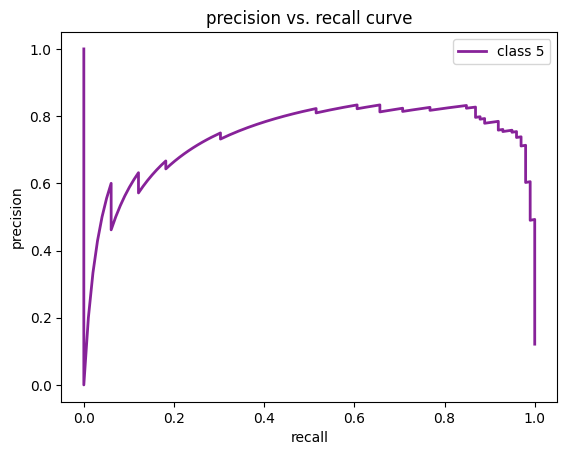

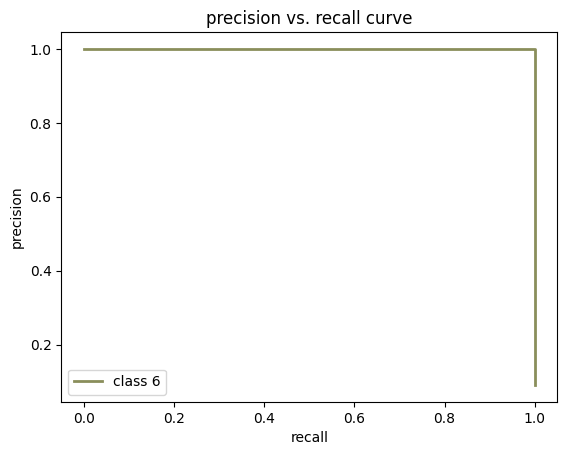

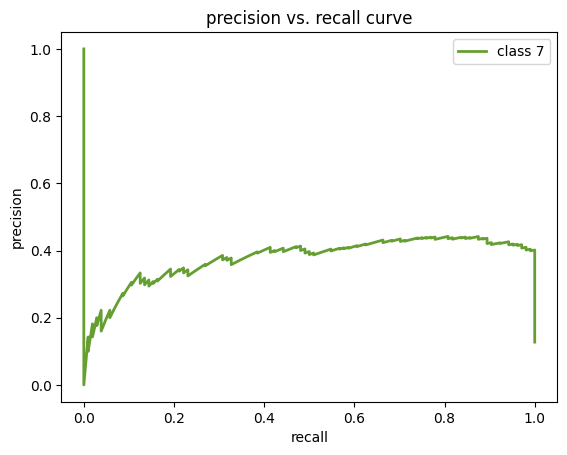

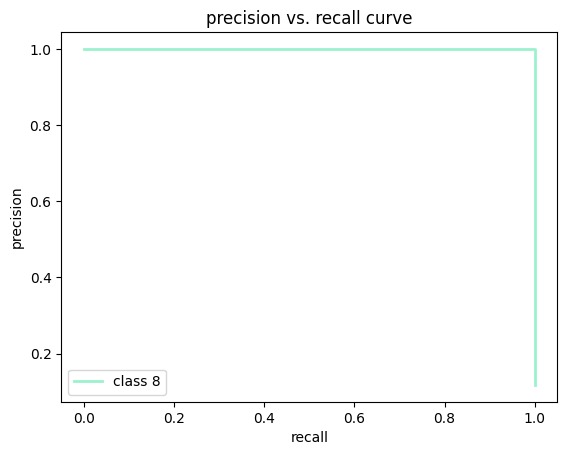

In [13]:
# Построение ROC-кривой
fpr = dict()
tpr = dict()

for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  preds1_proba[:, i])
    r = lambda: random.randint(0,255)
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i), c='#%02X%02X%02X' % (r(), r(), r()))

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.grid()
    plt.show()
# Построение PR-кривой
precision = dict()
recall = dict()
for i in range(9):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        preds1_proba[:, i])
    r = lambda: random.randint(0,255)
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i), c='#%02X%02X%02X' % (r(), r(), r()))
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()